In [1]:
!pip install yfinance

In [2]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
portfolio_composition = [('RELI',0.5),('SBI',0.3),('WIPRO.NS',0.2)]
returns = pd.DataFrame({})

for t in portfolio_composition:
    name = t[0]
    ticker = yfinance.Ticker(name)
    data = ticker.history(interval = '1d',
                     start = "2011-01-01", end = "2020-10-09")
    data["returns_%s" %(name)] = data['Close'].pct_change(1)
    
    returns = returns.join(data[["returns_%s" %(name)]], how = "outer").dropna()

In [40]:
returns

,returns_RELI,returns_SBI,returns_WIPRO.NS
Date,,,
2015-02-11,0.200000,-0.003010,-0.006536
2015-02-12,0.000000,0.005031,0.013158
2015-02-13,0.000000,0.001001,0.021493
2015-02-18,0.000000,0.005144,0.011336
2015-02-19,0.000000,-0.002047,-0.014198
...,...,...,...
2020-10-01,-0.100792,-0.004415,-0.001595
2020-10-05,0.076861,0.001117,0.066763
2020-10-06,0.000967,-0.002232,-0.011678


In [4]:
# MONTE CARLO SIMULATION OF A SINGLE STOCK

In [6]:
def simulate_returns(historical_returns, forecast_days):
    return historical_returns.sample(n = forecast_days,
                                    replace = True).reset_index(drop = True)
#REPLACE IS True because if its set to false then it means that sampling is not fully random and if sampling is not fully
#random then the simulation is not fully random


simulate_returns(returns['returns_RELI'],1000)

0      0.000000
1      0.016949
2      0.428571
3      0.104575
4     -0.121326
         ...   
995    0.000000
996    0.056769
997    0.000000
998    0.000000
999    0.000000
Name: returns_RELI, Length: 1000, dtype: float64

In [16]:
def simulate_portfolio(historical_returns, 
   composition, 
   forecast_days):
  result = 0
  for t in composition:
    name,weight = t[0],t[1]
    s = simulate_returns(historical_returns['returns_%s' %(name)], 
      forecast_days)
    result = result + s * weight
  
  return(result)


simulate_portfolio(returns,portfolio_composition,10)

0    0.209330
1   -0.004164
2    0.000864
3   -0.001716
4   -0.005077
5   -0.002273
6    0.005136
7   -0.003723
8   -0.008288
9   -0.034211
dtype: float64

In [17]:
def simulate_modified_returns(
      historical_returns,
      forecast_days,
      correct_mean_by):
  h = historical_returns.copy()
  new_series = h + correct_mean_by
  return new_series.sample(n=forecast_days,  
     replace = True).reset_index(drop=True)



In [18]:
def simulate_modified_portfolio(
   historical_returns,
   composition,
   forecast_days):
  
  result = 0
  
  for t in composition:
    name,weight,correction = t[0],t[1],t[2]
    s = simulate_modified_returns(
       historical_returns['returns_%s' % (name)], 
       forecast_days,correction
    )
    
    result = result + s * weight
  
  return(result)

In [19]:
def simulation(historical_returns,composition,forecast_days,n_iterations):
  simulated_portfolios = None

  for i in range(n_iterations):
    sim = simulate_modified_portfolio(historical_returns,composition,forecast_days)

    sim_port = pd.DataFrame({'returns_%d' % (i) : sim}) #making it a dictionary to finally call

    if simulated_portfolios is None:
      simulated_portfolios = sim_port
    else:
      simulated_portfolios = simulated_portfolios.join(sim_port)
    
  return simulated_portfolios

## Simulated portfolio with correction

In [20]:
returns.mean(axis=0)

returns_RELI        0.016299
returns_SBI         0.000156
returns_WIPRO.NS    0.000490
dtype: float64

In [21]:
portfolio_compositionN = [
   ('RELI', 0.5,-0.005), 
   ('SBI', 0.3,-0.0001), 
   ('WIPRO.NS', 0.2,-0.0002)
]

In [22]:
forecast_days = 20
n_iterations = 200

In [23]:
simulated_portfolios = simulation(returns,
    portfolio_compositionN,forecast_days,n_iterations)

simulated_portfolios.head()

,returns_0,returns_1,returns_2,returns_3,returns_4,returns_5,returns_6,returns_7,returns_8,returns_9,...,returns_190,returns_191,returns_192,returns_193,returns_194,returns_195,returns_196,returns_197,returns_198,returns_199
0,-0.052647,-0.000745,0.008382,-0.345775,0.003228,-0.052849,0.058472,0.043269,0.002851,-0.006345,...,-0.007070,-0.028956,0.004776,-0.098239,-0.013291,-0.004512,-0.004623,-0.026121,0.036721,-0.011945
1,-0.027706,-0.000927,-0.001820,0.034666,-0.009715,0.056827,-0.070349,-0.195860,-0.003664,-0.005542,...,0.000115,-0.004117,-0.002583,0.158916,-0.014832,-0.000649,0.002142,0.008095,-0.001768,-0.025149
2,0.429495,-0.002411,-0.004483,-0.080253,-0.051816,0.011674,-0.005000,0.019075,-0.001132,-0.004452,...,-0.006127,0.077592,-0.372874,-0.018570,0.001577,0.334439,-0.041385,0.102442,0.131053,-0.004437
3,-0.001802,-0.004994,-0.098851,0.004020,-0.006548,0.026545,-0.003560,-0.010657,-0.126205,0.030307,...,0.054891,-0.002912,-0.005576,0.036405,0.117626,0.066993,0.007497,-0.047198,0.003391,-0.142205
4,-0.003601,0.005985,-0.008399,-0.007196,-0.005335,0.000998,-0.075531,-0.000690,-0.053102,0.042451,...,-0.094527,-0.001580,0.013830,0.000642,-0.000797,-0.003700,-0.034350,-0.014640,-0.001617,-0.036288


In [27]:
percentile_5th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,5),axis=1)
percentile_95th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,95),axis=1)
average_port = simulated_portfolios.cumsum().apply(lambda x : np.mean(x),axis=1)

In [29]:
print(percentile_5th.tail(1))
print(percentile_95th.tail(1))
print(average_port.tail(1))

19   -0.480821
dtype: float64
19    1.176561
dtype: float64
19    0.128181
dtype: float64


## Confidence interval for future Portfolio

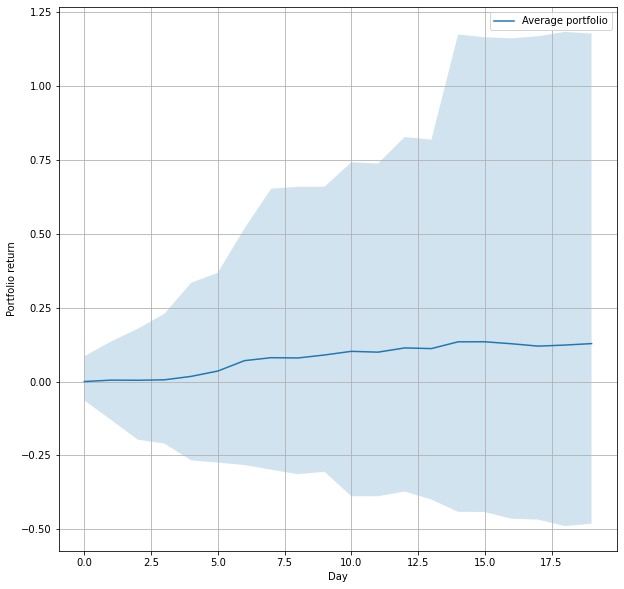

In [30]:
x = range(forecast_days)

plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(x,average_port,label="Average portfolio")
plt.xlabel("Day")
plt.ylabel("Portfolio return")


plt.fill_between(x, percentile_5th, percentile_95th, alpha=0.2 )
plt.grid()
plt.legend()

plt.show()

## Probablity of beating the portfolio target

In [32]:
target_return = 0.02

target_prob_port = simulated_portfolios.cumsum().apply(lambda x : np.mean(x > target_return),axis=1)

In [33]:
target_prob_port.tail(1)

19    0.495
dtype: float64

In [34]:
err_bars = np.sqrt(target_prob_port*(1-target_prob_port)/n_iterations)

In [35]:
err_bars.tail(1)

19    0.035354
dtype: float64

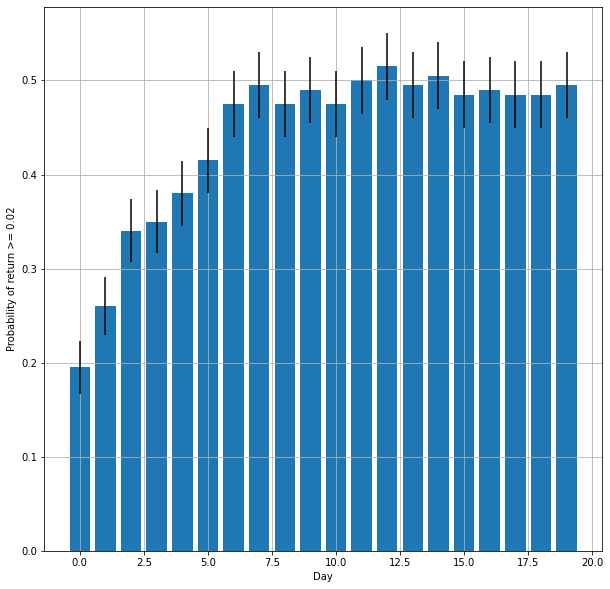

In [36]:
x = range(forecast_days)

plt.rcParams['figure.figsize'] = [10, 10]

plt.bar(x,target_prob_port,yerr = err_bars)

plt.xlabel("Day")
plt.ylabel("Probability of return >= %.2f" % (target_return))

plt.grid()

plt.show()

## Sharpe Ratio Histogram

In [37]:
sharpe_indices = simulated_portfolios.apply(lambda x : np.mean(x)/np.std(x))

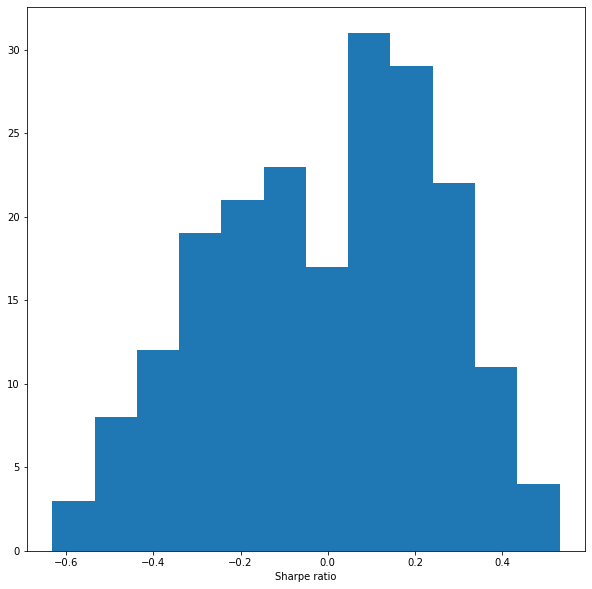

In [38]:
plt.hist(sharpe_indices,bins="rice")
plt.xlabel("Sharpe ratio")

plt.show()

## Sharpe Ratio Mean Value

In [41]:
np.mean(sharpe_indices)

-0.004887978578357556